In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# from statsmodels.stats.proportion import proportions_ztest

In [57]:
df= pd.read_csv('clean.csv')

In [58]:
df.drop('Unnamed: 0', axis=1, inplace= True)

In [4]:
df

,Study area,Gender,Age,Educational Status,Years of residence,Frequency of visit,Purpose of visit,Use river water for drinking,Acceptance of water quality,Status of fish population,Status of fish diversity,Presence of Alien species,Cause of fish decline,Pollution status,Nature of pollutants
0,Parali,Female,40-59,Graduate,10-20,Daily,Domestic activities,Yes,Yes,Don't know,Don't know,Don't know,Illegfishing,Heavily polluted,Biologiccontaminants
1,Parali,Male,60-79,HS,>20,Daily,Domestic activities,Yes,Yes,Know,Know,Yes,Illegfishing,Moderately polluted,Biologiccontaminants
2,Parali,Male,60-79,HS,>20,Daily,Domestic activities,Yes,Yes,Know,Know,Yes,Don't know,Slightly polluted,Biologiccontaminants
3,Parali,Female,40-59,HS,>20,Daily,Domestic activities,Yes,Yes,Know,Know,Yes,Don't know,Moderately polluted,Biologiccontaminants
4,Parali,Female,60-79,Primary,>20,Never,Not visiting,No,Yes,Don't know,Don't know,Don't know,Don't know,Slightly polluted,Biologiccontaminants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Ponnani,Male,40-59,Primary,>20,Daily,Fishing,No,No,Know,Know,Yes,Don't know,Slightly polluted,Gross solids
296,Ponnani,Male,40-59,HS,>20,Never,Not visiting,No,No,Don't know,Don't know,Don't know,Don't know,Slightly polluted,Gross solids
297,Ponnani,Male,60-79,HS,>20,Never,Not visiting,No,No,Don't know,Don't know,Don't know,Don't know,Not polluted,No pollutants
298,Ponnani,Male,60-79,Primary,10-20,Occasionally,Fishing,No,Yes,Know,Know,Don't know,Don't know,Not polluted,No pollutants


## Use of water for drinking; effect of Study area

In [22]:
df.groupby('Study area')['Use river water for drinking'] .value_counts()

Study area  Use river water for drinking
Ivarmadom   No                              47
            Yes                             15
Parali      No                              47
            Yes                             17
Pattambi    No                              61
            Yes                              5
Ponnani     No                              36
            Yes                              3
Shoranur    No                              48
            Yes                              2
Name: Use river water for drinking, dtype: int64

In [126]:
df['Study area'].value_counts()

Pattambi     76
Parali       64
Ivarmadom    62
Shoranur     57
Ponnani      40
Name: Study area, dtype: int64

Proportion test output from R:

5-sample test for equality of proportions without continuity correction

data:  c(15, 17, 5, 3, 2) out of c(62, 64, 76, 40, 57)
<br>X-squared = 23.515, df = 4, p-value = 9.991e-05
<br>alternative hypothesis: two.sided
<br>sample estimates:
<br>prop 1: 0.23809524
<br>prop 2: 0.26562500
<br>prop 3: 0.06578947
<br>prop 4: 0.07500000
<br>prop 5: 0.03508772

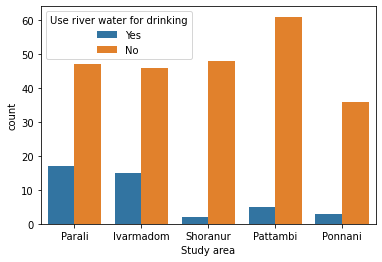

In [127]:
sns.countplot(x= df['Study area'], data= df, hue= 'Use river water for drinking')
plt.show()

proportion test indicates significant difference
<br>Parali and Ivarmadom shows ~= 25% positive reception
<br>remaining 3 has very low, <8%

## Pollution status; effect of study area

In [30]:
df['Pollution status'].value_counts()

Not polluted           127
Moderately polluted     72
Slightly polluted       69
Heavily polluted        31
Name: Pollution status, dtype: int64

In [25]:
df[df['Pollution status'].isnull()]

,Study area,Gender,Age,Educational Status,Years of residence,Frequency of visit,Purpose of visit,Use river water for drinking,Acceptance of water quality,Status of fish population,Status of fish diversity,Presence of Alien species,Cause of fish decline,Pollution status,Nature of pollutants
5,Parali,Male,60-79,HS,>20,Daily,Domestic activities,No,Yes,Know,Know,Yes,Illegfishing,NaN,Gross solids
48,Parali,Female,60-79,Primary,>20,Daily,Domestic activities,Yes,Yes,Know,Know,Don't know,Don't know,NaN,No pollutants


In [26]:
df['Pollution status']= df['Pollution status'].fillna(df[df['Study area']=='Parali']['Pollution status'].mode()[0])

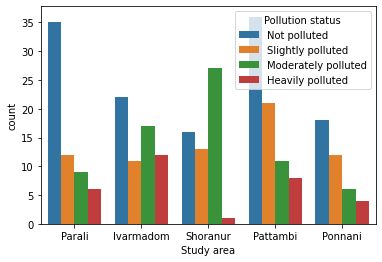

In [116]:
sns.countplot(x= df['Study area'], data= df, hue= 'Pollution status', hue_order= ['Not polluted', 'Slightly polluted', 'Moderately polluted', 'Heavily polluted'])
plt.show()

In terms of opinion, Shoranur is the only study area where the record 'Not polluted' is outnumbered by a single level of pollution record (Moderately polluted).
<br>Ivarmadom records very close number of observations of the two levels above mentioned, where the opinion 'Heavily polluted' is also high in number.
<br>Ponnani and Pattambi show similar patterns where lower levels of lower of pollution occur higher in number. 
<br>Parali also shows a similar pattern, but with the level 'Not polluted' occurring significantly more frequently than seen in the above two.

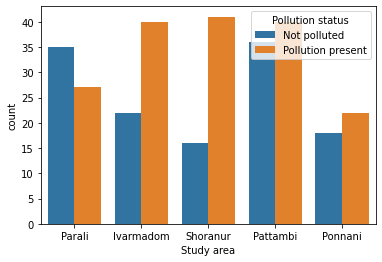

In [63]:
d_ps= df.copy()
d_ps['Pollution status']= d_ps['Pollution status'].map({'Not polluted' : 'Not polluted',
                                                       'Slightly polluted' : 'Pollution present',
                                                       'Moderately polluted' : 'Pollution present',
                                                       'Heavily polluted' : 'Pollution present'}) 

sns.countplot(x= d_ps['Study area'], data= d_ps, hue= 'Pollution status', hue_order= ['Not polluted', 'Pollution present'])
plt.show()

Considering all levels of presence of pollution to be a single group to be compared against the level 'No pollution'.
<br>Parali is the only study area where the opinion that the river is not polluted outnumbers the one that pollution is present.
<br>Ivarmadom and Shoranur areas have high volume stating presence of pollution against it's counter statement.
<br>Pattambi and Ponnani shows similar trends, but with the difference in volume of the two opinions much less compared to the areas mentioned above.

## Pollution status; effect of frequency of visit

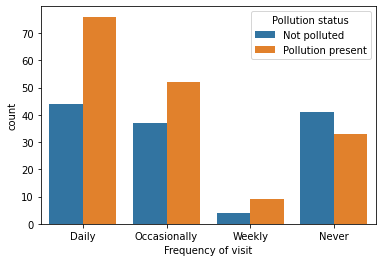

In [62]:
sns.countplot(x= d_ps['Frequency of visit'], data= d_ps, hue= 'Pollution status', order= ['Daily', 'Occasionally', 'Weekly', 'Never'], hue_order= ['Not polluted', 'Pollution present'])
plt.show()

There is a visible trend that people tend to share the opinion that the river is polluted on some level more when their frequency of visit is higher. The opinion that there is no polllution becomes more popular than it's counter statement among people who never visit the river.

In [64]:
d_ps.groupby('Frequency of visit')['Pollution status'].value_counts()

Frequency of visit  Pollution status 
Daily               Pollution present    76
                    Not polluted         44
Daily;Occasionally  Pollution present     1
Daily;Weekly        Not polluted          1
Never               Not polluted         41
                    Pollution present    33
Occasionally        Pollution present    52
                    Not polluted         37
Weekly              Pollution present     9
                    Not polluted          4
Name: Pollution status, dtype: int64

In [65]:
d_ps['Frequency of visit'].value_counts()

Daily                 122
Occasionally           89
Never                  74
Weekly                 13
Daily;Weekly            1
Daily;Occasionally      1
Name: Frequency of visit, dtype: int64

Proportion test output from R:

4-sample test for equality of proportions without continuity correction

data:  c(76, 52, 33, 9) out of c(122, 89, 74, 13)
<br>X-squared = 6.9109, df = 3,
<br>p-value = 0.07479
<br>alternative hypothesis: two.sided
<br>sample estimates:
<br>prop 1: 0.6229508
<br>prop 2: 0.5842697
<br>prop 3: 0.4459459
<br>prop 4: 0.6923077

A proportion test fails to reject the null hypothesis that the proportions of people who is of the opinion that some level of pollution is present in the river among the 4 different frequency of visit is different.
<br>So we cannot infer that there is statistically significant difference in the awareness of people depending on the frequency of visit, from this dataset.

## Pollution status; effect of years of residence

In [66]:
df['Years of residence'].value_counts()

>20      199
10-20     49
5-10      27
<5        22
Name: Years of residence, dtype: int64

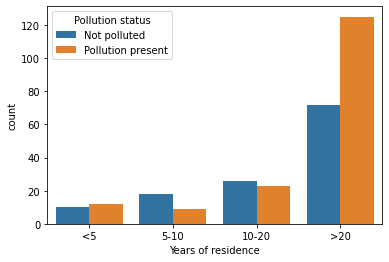

In [68]:
sns.countplot(x= d_ps['Years of residence'], data= d_ps, hue= 'Pollution status', order= ['<5', '5-10', '10-20', '>20'], hue_order= ['Not polluted', 'Pollution present'])
plt.show()

Although we cannot infer a clear pattern from this, the group '>20' shows a proportion very different from the others. It is desirable to further look into this considering the rest of the levels as a single group

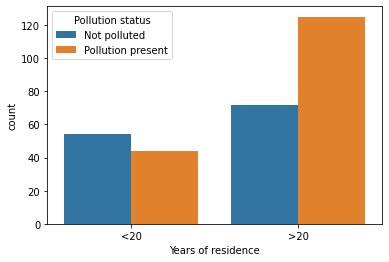

In [72]:
d_yr=d_ps.copy()
d_yr['Years of residence']= d_yr['Years of residence'].map({'>20' : '>20',
                                                           '10-20' : '<20',
                                                           '5-10' : '<20',
                                                           '<5' : '<20'})

sns.countplot(x= d_yr['Years of residence'], data= d_yr, hue= 'Pollution status', order= ['<20', '>20'], hue_order= ['Not polluted', 'Pollution present'])
plt.show()

In [73]:
d_yr.groupby('Years of residence')['Pollution status'].value_counts()

Years of residence  Pollution status 
<20                 Not polluted          54
                    Pollution present     44
>20                 Pollution present    125
                    Not polluted          72
Name: Pollution status, dtype: int64

In [74]:
d_yr['Years of residence'].value_counts()

>20    199
<20     98
Name: Years of residence, dtype: int64

Proportion test output from R:

2-sample test for equality of proportions with continuity correction

data:  c(125, 44) out of c(199, 98)
<br>X-squared = 7.8796,
<br>df = 1,
<br>p-value = 0.005
<br>alternative hypothesis: two.sided
<br>95 percent confidence interval: (0.05235512, 0.30596710)
<br>sample estimates:
<br>prop 1: 0.6281407
<br>prop 2: 0.4489796

Proportion test indicates significant difference in the proportion of people who say the river is polluted to some level. Those who have been residing there for more than 20 years tend to say that the river is polluted. Having been able to witness changes over a much larger period of time could be the reason for this.

## Status of fish population and Status of fish diversity

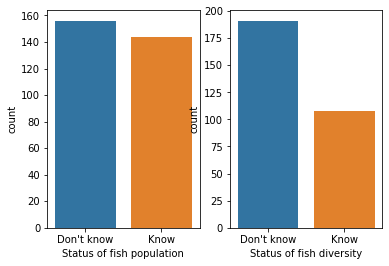

In [94]:
figure, axis= plt.subplots(1,2)

sns.countplot(x=df['Status of fish population'], data=df, ax=axis[0])
sns.countplot(x=df['Status of fish diversity'], data=df, ax=axis[1])

plt.show()


# figure.show()

In [102]:
df['Status of fish population'].value_counts()/len(df)*100

Don't know    52.0
Know          48.0
Name: Status of fish population, dtype: float64

In [103]:
df['Status of fish diversity'].value_counts()/len(df)*100

Don't know    63.666667
Know          36.000000
Name: Status of fish diversity, dtype: float64

The awareness about Fish Diversity (36%) is lower than awareness about Fish Population (48%)

## Cause of fish decline

In [101]:
df['Cause of fish decline'].value_counts()/len(df)*100

Don't know                                            89.666667
Illegfishing                                           8.333333
Dand associated sediment accumulation                  1.666667
Dand associated sediment accumulation;Illegfishing     0.333333
Name: Cause of fish decline, dtype: float64

Almost 90% of people are not aware about the Cause of fish decline

In [105]:
df['Presence of Alien species'].value_counts()/len(df)*100

Don't know    73.000000
Yes           18.000000
No             8.666667
Name: Presence of Alien species, dtype: float64

18% of people believe in the Presence of Alien species while 8.7% do not. 73% are not aware of the factor.